# The Human Connectome Project (HCP)

* Began in 2009 as an NIH Blueprint Grand Challenge
* Goal of collecting an unprecedented dataset of functional and structural connectivity in the human brain 
* Funded through consortia:
  * Harvard/MGH–UCLA (Harvard / Massachusetts General Hospital and U. of California Los Angeles)  
    Development of HCP Technology  
    PIs: Bruce Rosen and Arthur Toga
  * WU–Minn (Washington U. and U. of Minnesota)  
    Young Adult HCP  
    PIs: David Van Essen & Kamil Ugurbil
* Additional follow-up projects:
  * Lifespan Connectome: Healthy adults of all ages
  * Disease Connectome: Adults with clinical diagnoses
* Data are public and coordinated through a single facility: [https://www.humanconnectome.org/](https://www.humanconnectome.org/)

## Young Adult Human Connectome

In this notebook we will focus on the Young Adult HCP:
* ~1,200 subjects, age 22-35
* Includes:
  * Structural MRI
  * Diffusion-weighted Imaging
  * Functional Task-evoked and Resting-state MRI
  * 7T MRI (~200 subjects)
  * Various Behavioral Data
  * Genetic Family Data (~300 twin-pairs)
  * Resting-state and Task-evoked MEG (~100 subjects)
* Extensively pre-processed
* HCPpipelines protocol: https://github.com/Washington-University/HCPpipelines  
  Based on FreeSurfer with additional features such as MSM alignments across subjects (Multimodal Surface Matching)

The Young Adult HCP is available from multiple sources. One of these sources is the website https://www.humanconnectome.org/ where you can register for the dataset and download the data using your web browser. This works fine, but it is generally easier and interact with datasets of this size over S3 because we don't have to download everything and can instead just download the data we are interested in.

To connect to the HCP S3 bucket, we will need to have a set of S3 credentials for the HCP in our `~/.aws/credentials` file (the `~` represents your home directory, so on the hub this is `/home/jovyan/.aws/credentials`). This file typically contains AWS credentials, and format information can be found online ([here](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-files.html)). To obtain the credentials that must be put there, you will need to register with the HCP. Instructions for doing this are below:

### Setting up HCP Credentials
* The HCP database is free to access, but you must register with the HCP in order to obtain login credentials. To do so, visit the ConnectomeDB page and follow the instructions to create an account (start with the "Register" button).
* Once you have created an account, you should be able to login to the database and browse the available datasets through their web portal. You may use this interface to access the HCP data, but in the data showcase we will look at how to use some Python libraries (cloudpathlib and neuropythy) to access the data via the HCP Amazon S3 bucket. The official information (from the HCP) on how to do this can be found at this page. Please follow the first few steps, through the creation of the AWS credentials. Without these, Python cannot access the data on your behalf.
* Once you have generated your AWS key (“`ACCESS KEY ID`”) and secret (“`SECRET ACCESS KEY`”), you will need to put them in a file in your home directory named `.aws/credentials`; this file follows a format specified by Amazon Web Services. You can produce this file using the following four commands; these commands are given here but without the access key ID or the secret access key spelled out, so make sure to replace the `______________` with your AWS key ID and to replace the `********************` with your AWS secret access key. You do not need to put these in quotes. Be careful to preserve the single quotes (`'`) in the commands! These commands are meant to be run in a JupyterHub terminal, but you can run them in a JupyterHub notebook on the hub by putting an `!` at the front of each of the commands (i.e., `! mkdir ...` and `! echo ...`):  
  ```bash
  mkdir -p ~/.aws
  echo '[hcp]' > ~/.aws/credentials
  echo 'aws_access_key_id = ______________' >> ~/.aws/credentials
  echo 'aws_secret_access_key = ********************' >> ~/.aws/credentials
  ```

### Accessing the HCP Data on S3

Once we have setup our credentials, we can simply tell our `S3Path` and `S3Client` object that our credentials are labeled `hcp`.

In [1]:
from pathlib import Path
from cloudpathlib import S3Path, S3Client

# Make sure that we have a cache path:
cache_path = Path('/tmp/cache')
if not cache_path.exists():
    cache_path.mkdir()

hcp_base_path = S3Path(
    's3://hcp-openaccess/HCP_1200/',
    client=S3Client(
        local_cache_dir=cache_path,
        profile_name='hcp'))

Once we have created the base HCP path, we can go ahead and look at the contents. The HCP uses 6-digit subject IDs, and we can see all of them by listing the contents of the path we just created.

In [2]:
hcp_subdirs = list(hcp_base_path.iterdir())
# There are about 1200 of these, so we won't show them all, just the first 10:
hcp_subdirs[:10]

[S3Path('s3://hcp-openaccess/HCP_1200/100206'),
 S3Path('s3://hcp-openaccess/HCP_1200/100307'),
 S3Path('s3://hcp-openaccess/HCP_1200/100408'),
 S3Path('s3://hcp-openaccess/HCP_1200/100610'),
 S3Path('s3://hcp-openaccess/HCP_1200/101006'),
 S3Path('s3://hcp-openaccess/HCP_1200/101107'),
 S3Path('s3://hcp-openaccess/HCP_1200/101309'),
 S3Path('s3://hcp-openaccess/HCP_1200/101410'),
 S3Path('s3://hcp-openaccess/HCP_1200/101915'),
 S3Path('s3://hcp-openaccess/HCP_1200/102008')]

Let's look inside one of these subject's directories. We can write a simple function that crawls the entire directory and prints all of the contents:

In [3]:
from utilities import crawl

# We'll crawl a specific subpath for subject 100610: 100610/T1w/100610;
# this is the FreeSurfer subdirectory of the HCPpipelines output.

# If you accidentally run this on the hcp_base_path, it will take a very
# long time to run!
sub100610_freesurfer_path = hcp_base_path / '100610' / 'T1w' / '100610'
crawl(sub100610_freesurfer_path)

100610
   label
      BA.ctab
      BA.thresh.ctab
      aparc.annot.DKTatlas40.ctab
      aparc.annot.a2009s.ctab
      aparc.annot.ctab
      lh.BA.annot
      lh.BA.thresh.annot
      lh.BA1.label
      lh.BA1.thresh.label
      lh.BA2.label
      lh.BA2.thresh.label
      lh.BA3a.label
      lh.BA3a.thresh.label
      lh.BA3b.label
      lh.BA3b.thresh.label
      lh.BA44.label
      lh.BA44.thresh.label
      lh.BA45.label
      lh.BA45.thresh.label
      lh.BA4a.label
      lh.BA4a.thresh.label
      lh.BA4p.label
      lh.BA4p.thresh.label
      lh.BA6.label
      lh.BA6.thresh.label
      lh.MT.label
      lh.MT.thresh.label
      lh.V1.label
      lh.V1.thresh.label
      lh.V2.label
      lh.V2.thresh.label
      lh.aparc.DKTatlas40.annot
      lh.aparc.a2009s.annot
      lh.aparc.annot
      lh.cortex.deformed.label
      lh.cortex.label
      lh.cortex.prehires.label
      lh.entorhinal_exvivo.label
      lh.perirhinal.label
      rh.BA.annot
      rh.BA.thresh.annot
      

In [4]:
# If we want to load one of these files into nibabel, we can convert it
# into a filesystem path (cloudpaths cannot just be passed to nibabel).

import nibabel as nib

brain_img_path = sub100610_freesurfer_path / 'mri' / 'brain.mgz'
brain_img = nib.load(brain_img_path.fspath)

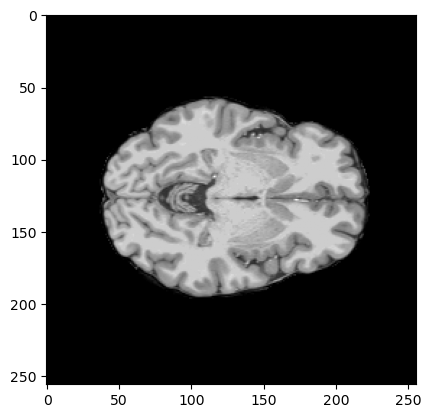

In [5]:
# Display a slice from the brain:

import matplotlib.pyplot as plt

plt.imshow(brain_img.dataobj[:,150,:], cmap='gray')
plt.show()